In [1]:
import matplotlib.pyplot as plt
from matplotlib import image
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import cv2
import os
from BfTableGenerator import TDmapLoader
from tqdm import tqdm
from Utils import *
from open3d.web_visualizer import draw
from joblib import Parallel, delayed
from VisulizerTools import *
from DDBSCAN import Raster_DBSCAN
plt.rcParams["font.family"] = "Times New Roman"

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [10]:
aggregated_map = []
Inten_maps = []
pcap_path = r'D:\LiDAR_Data\MidTown\California\2021-12-8-18-0-0.pcap'
end_frame = 5000
lidar_reader = TDmapLoader(pcap_path)
frame_gen = lidar_reader.frame_gen()
for i in tqdm(range(end_frame)):
    Frame = next(frame_gen)
    if Frame is None:
        break 
    Td_map,Int_map = Frame
    aggregated_map.append(Td_map)
    Inten_maps.append(Int_map)
aggregated_map = np.array(aggregated_map)
Inten_maps = np.array(Inten_maps)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [03:13<00:00, 25.87it/s]


In [11]:
thred_map = gen_bckmap(aggregated_map, N = 10, d_thred = 0.1, d = 0.17, bck_n = 3 )

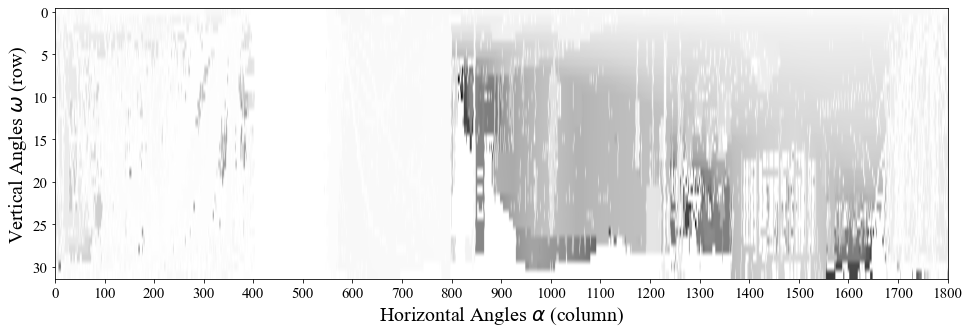

In [12]:
plt.figure(figsize=(16,5))
plt.imshow(aggregated_map[235], aspect='auto',cmap = 'binary')
plt.xlabel(r'Horizontal Angles $\mathit{\alpha}$ (column)',fontsize = 20)
plt.ylabel(r'Vertical Angles $\mathit{\omega} $ (row)',fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(0,1900,100),fontsize = 15)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture4.tif',dpi = 600)
plt.show()

[22.464]
1463


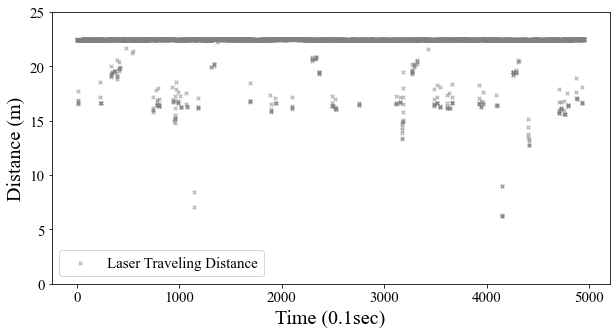

In [18]:
laser_id = theta_raw[28] == theta
azimuth_channel = int(np.around((28661/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 12, marker = 'x', label = "Laser Traveling Distance", c = 'gray', alpha = 0.5)
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(0,25)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture5.tif', dpi = 600)
plt.show()

In [176]:
theta_raw = np.array([[-25,1.4],[-1,-4.2],[-1.667,1.4],[-15.639,-1.4],
                            [-11.31,1.4],[0,-1.4],[-0.667,4.2],[-8.843,-1.4],
                            [-7.254,1.4],[0.333,-4.2],[-0.333,1.4],[-6.148,-1.4],
                            [-5.333,4.2],[1.333,-1.4],[0.667,4.2],[-4,-1.4],
                            [-4.667,1.4],[1.667,-4.2],[1,1.4],[-3.667,-4.2],
                            [-3.333,4.2],[3.333,-1.4],[2.333,1.4],[-2.667,-1.4],
                            [-3,1.4],[7,-1.4],[4.667,1.4],[-2.333,-4.2],
                            [-2,4.2],[15,-1.4],[10.333,1.4],[-1.333,-1.4]
                            ])[:,0]

[0.]
1463


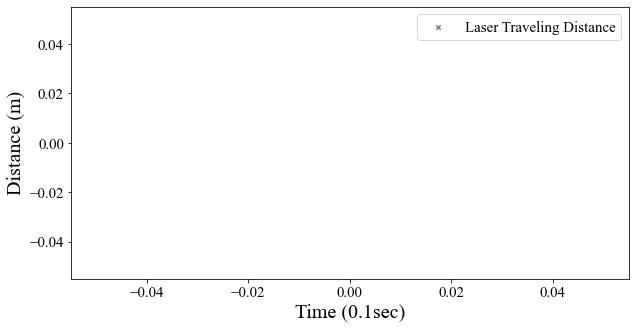

In [6]:
laser_id = theta_raw[28] == theta
azimuth_channel = int(np.around((28661/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
# plt.ylim(22.2,22.8)
# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture6.tif', dpi = 600)
plt.show()

In [84]:
thred_map = gen_bckmap(aggregated_map, N = 10, d_thred = 0.1, d = 0.1, bck_n = 3 )

In [57]:
for i in range(32):
    for j in range(1800):
        thred = thred_map[:,i,j]
        if (thred > 0).sum() >= 2:
            print(i,j)

0 2
0 3
0 5
0 14
0 15
0 20
0 22
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 50
0 60
0 61
0 65
0 67
0 69
0 89
0 90
0 91
0 94
0 95
0 96
0 100
0 230
0 231
0 232
0 233
0 239
0 241
0 243
0 311
0 358
0 359
0 373
0 375
0 380
0 565
0 566
0 567
0 628
0 630
0 695
0 702
0 703
0 798
0 1753
0 1754
0 1760
0 1761
0 1762
0 1763
0 1765
0 1768
0 1769
0 1771
0 1780
0 1781
0 1786
0 1790
0 1791
0 1798
0 1799
1 11
1 15
1 19
1 21
1 22
1 26
1 29
1 32
1 33
1 34
1 40
1 41
1 42
1 46
1 50
1 52
1 53
1 56
1 57
1 58
1 61
1 62
1 65
1 67
1 68
1 72
1 75
1 80
1 81
1 83
1 93
1 96
1 97
1 101
1 103
1 104
1 107
1 108
1 111
1 112
1 115
1 116
1 117
1 118
1 119
1 120
1 125
1 126
1 131
1 132
1 133
1 134
1 137
1 138
1 144
1 157
1 158
1 159
1 166
1 167
1 170
1 171
1 173
1 175
1 184
1 194
1 201
1 203
1 204
1 205
1 207
1 209
1 210
1 211
1 212
1 216
1 217
1 218
1 223
1 227
1 230
1 231
1 253
1 255
1 264
1 268
1 269
1 274
1 281
1 283
1 291
1 302
1 312
1 336
1 338
1 339
1 340
1 342
1 345
1 370
1 374
1 3

12 226
12 228
12 229
12 237
12 241
12 242
12 243
12 288
12 294
12 297
12 330
12 331
12 337
12 344
12 348
12 349
12 353
12 355
12 356
12 358
12 359
12 387
12 390
12 577
12 583
12 585
12 590
12 592
12 599
12 600
12 607
12 608
12 609
12 611
12 616
12 621
12 647
12 659
12 669
12 670
12 672
12 673
12 674
12 675
12 676
12 685
12 686
12 698
12 699
12 800
12 801
12 831
12 833
12 836
12 837
12 840
12 842
12 843
12 848
12 849
12 852
12 862
12 865
12 870
12 871
12 872
12 885
12 887
12 892
12 899
12 900
12 901
12 902
12 903
12 904
12 905
12 906
12 907
12 908
12 909
12 912
12 913
12 914
12 917
12 919
12 922
12 923
12 927
12 928
12 929
12 930
12 931
12 932
12 933
12 934
12 935
12 936
12 937
12 938
12 939
12 941
12 942
12 944
12 945
12 947
12 948
12 951
12 952
12 954
12 955
12 956
12 957
12 958
12 959
12 960
12 961
12 962
12 963
12 964
12 965
12 966
12 967
12 971
12 972
12 974
12 977
12 978
12 981
12 982
12 986
12 987
12 988
12 989
12 990
12 993
12 997
12 998
12 1001
12 1002
12 1003
12 1005
12 1006
1

16 1567
16 1569
16 1570
16 1591
16 1595
16 1611
16 1612
16 1630
16 1631
16 1632
16 1633
16 1664
16 1669
16 1692
16 1697
16 1701
16 1702
16 1703
16 1706
16 1715
16 1716
16 1720
16 1721
16 1722
16 1727
16 1732
16 1733
16 1736
16 1739
16 1740
16 1742
16 1743
16 1745
16 1746
16 1747
16 1748
16 1749
16 1753
16 1756
16 1757
16 1760
16 1761
16 1762
16 1764
16 1765
16 1766
16 1768
16 1769
16 1770
16 1777
16 1778
16 1781
17 1
17 2
17 5
17 6
17 8
17 33
17 35
17 39
17 40
17 42
17 43
17 47
17 53
17 55
17 57
17 61
17 62
17 63
17 64
17 68
17 69
17 72
17 73
17 75
17 76
17 77
17 84
17 85
17 86
17 87
17 91
17 93
17 94
17 97
17 99
17 100
17 109
17 110
17 111
17 115
17 116
17 118
17 127
17 143
17 147
17 156
17 172
17 177
17 179
17 182
17 184
17 186
17 191
17 193
17 218
17 220
17 221
17 222
17 223
17 224
17 225
17 226
17 227
17 228
17 229
17 230
17 231
17 233
17 235
17 238
17 266
17 268
17 270
17 273
17 328
17 338
17 345
17 348
17 354
17 365
17 367
17 375
17 380
17 383
17 384
17 386
17 388
17 391
17 396
1

20 1538
20 1539
20 1541
20 1542
20 1544
20 1545
20 1552
20 1557
20 1559
20 1561
20 1570
20 1571
20 1580
20 1581
20 1582
20 1599
20 1600
20 1602
20 1603
20 1604
20 1611
20 1621
20 1646
20 1647
20 1648
20 1649
20 1656
20 1669
20 1675
20 1678
20 1682
20 1689
20 1701
20 1702
20 1703
20 1706
20 1708
20 1709
20 1711
20 1714
20 1718
20 1719
20 1721
20 1726
20 1729
20 1730
20 1737
20 1738
20 1741
20 1745
20 1746
20 1748
20 1757
20 1759
20 1764
20 1767
20 1769
20 1771
20 1772
20 1773
20 1774
20 1777
20 1780
21 4
21 5
21 6
21 8
21 9
21 10
21 12
21 14
21 41
21 45
21 46
21 50
21 51
21 56
21 57
21 60
21 66
21 73
21 76
21 77
21 81
21 86
21 90
21 91
21 92
21 95
21 96
21 98
21 104
21 105
21 108
21 115
21 119
21 120
21 121
21 122
21 123
21 138
21 139
21 141
21 142
21 143
21 148
21 149
21 191
21 192
21 193
21 194
21 196
21 200
21 201
21 202
21 206
21 207
21 215
21 220
21 225
21 226
21 228
21 254
21 255
21 261
21 262
21 263
21 292
21 293
21 320
21 357
21 359
21 371
21 378
21 379
21 383
21 390
21 571
21 5

25 1326
25 1327
25 1341
25 1342
25 1343
25 1344
25 1345
25 1346
25 1359
25 1361
25 1368
25 1369
25 1370
25 1371
25 1372
25 1373
25 1374
25 1375
25 1376
25 1382
25 1384
25 1435
25 1436
25 1454
25 1455
25 1457
25 1462
25 1464
25 1473
25 1477
25 1478
25 1481
25 1483
25 1487
25 1488
25 1492
25 1495
25 1514
25 1518
25 1533
25 1535
25 1537
25 1539
25 1541
25 1542
25 1544
25 1545
25 1547
25 1548
25 1549
25 1555
25 1559
25 1560
25 1561
25 1562
25 1563
25 1569
25 1578
25 1579
25 1580
25 1583
25 1587
25 1588
25 1589
25 1598
25 1599
25 1600
25 1604
25 1605
25 1608
25 1614
25 1624
25 1625
25 1626
25 1632
25 1637
25 1643
25 1661
25 1673
25 1675
25 1676
25 1682
25 1693
25 1709
25 1710
25 1711
25 1713
25 1714
25 1716
25 1719
25 1721
25 1727
25 1731
25 1732
25 1737
25 1741
25 1743
25 1745
25 1748
25 1749
25 1750
25 1762
25 1763
25 1768
25 1769
25 1774
25 1776
25 1780
25 1781
25 1798
26 15
26 16
26 17
26 18
26 20
26 29
26 32
26 35
26 50
26 56
26 57
26 59
26 60
26 61
26 63
26 64
26 65
26 66
26 67
26 68


30 58
30 66
30 69
30 78
30 82
30 83
30 85
30 88
30 91
30 93
30 94
30 130
30 131
30 139
30 140
30 142
30 143
30 146
30 147
30 148
30 149
30 150
30 151
30 167
30 168
30 178
30 179
30 189
30 194
30 195
30 203
30 212
30 213
30 214
30 221
30 223
30 227
30 232
30 233
30 235
30 240
30 243
30 244
30 250
30 253
30 255
30 259
30 264
30 265
30 266
30 267
30 276
30 277
30 278
30 293
30 295
30 301
30 311
30 312
30 315
30 316
30 340
30 341
30 342
30 344
30 346
30 347
30 349
30 350
30 352
30 353
30 354
30 356
30 358
30 359
30 360
30 362
30 368
30 374
30 380
30 382
30 607
30 773
30 796
30 948
30 949
30 951
30 952
30 954
30 955
30 956
30 957
30 958
30 959
30 960
30 961
30 971
30 973
30 974
30 975
30 976
30 977
30 978
30 980
30 982
30 983
30 985
30 987
30 992
30 993
30 994
30 996
30 997
30 1000
30 1003
30 1004
30 1006
30 1007
30 1226
30 1228
30 1229
30 1247
30 1254
30 1301
30 1362
30 1364
30 1365
30 1366
30 1367
30 1368
30 1369
30 1370
30 1371
30 1372
30 1374
30 1375
30 1386
30 1397
30 1402
30 1405
30 1

In [55]:
Td_map = aggregated_map[482]
Colored_map = -1*np.ones_like(Td_map)
Colored_map[9:12,1400:1500] = 0
Colored_map = Colored_map.astype(int)
pcd = get_pcd_colored(Td_map,Colored_map)
draw(pcd,height=1000,width=1000)


WebVisualizer(window_uid='window_19')

18.624
1226


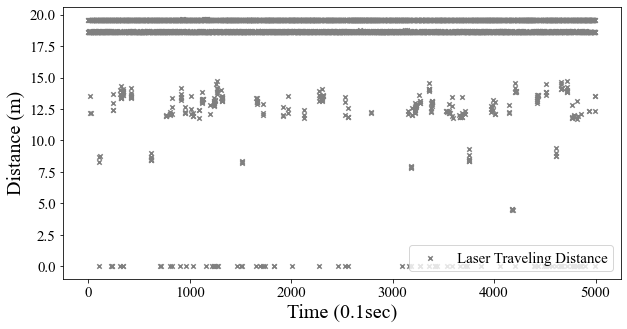

In [66]:
laser_id = 3
azimuth_channel = 1226
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
# for i in range(len(thred)):
#     plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
# plt.ylim(3,3.25)
# plt.xlim(1400,1500)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\MultiModal2.tif', dpi = 600)
plt.show()

18.624
1226


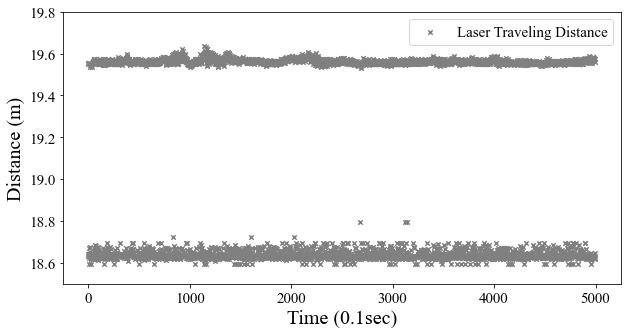

In [74]:
laser_id = 3
azimuth_channel = 1226
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
# for i in range(len(thred)):
#     plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(18.5,19.8)
# plt.xlim(1400,1500)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\MultiModal3.tif', dpi = 600)
plt.show()

0.0
138


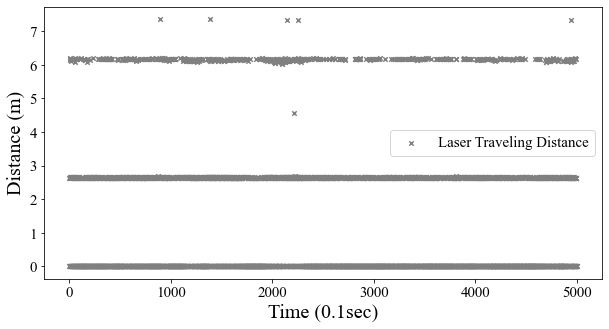

In [45]:
laser_id = 8
azimuth_channel = int((3376/100)/0.2) - 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
# for i in range(len(thred)):
#     plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
# plt.ylim(0,65)
# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\MultiModal.tif', dpi = 600)
plt.show()

[51.9]
138


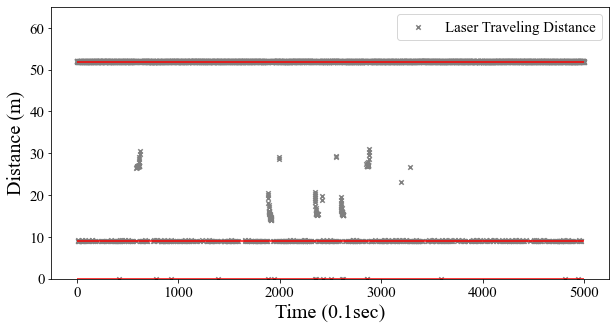

In [9]:
laser_id = theta_raw[5] == theta
azimuth_channel = int((3376/100)/0.2) - 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
for i in range(len(thred)):
    plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(0,65)
# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\MultiModal.tif', dpi = 600)
plt.show()

[33.608]
1429


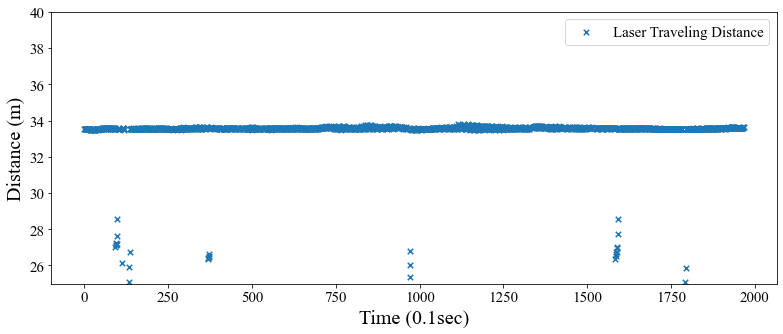

In [12]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Laser Traveling Distance")
# plt.plot(np.arange(len(temp)),temp)
# plt.grid()
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(25,40)
# plt.xlim(220,250)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture8.tif', dpi = 600)
plt.show()

[33.608]
1429


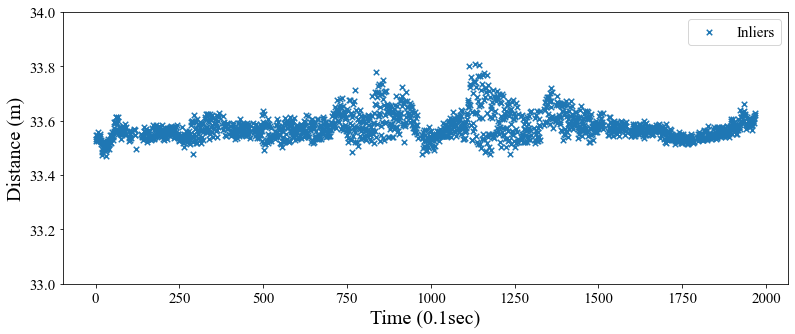

In [32]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Inliers")
# plt.plot(np.arange(len(temp)),temp)
# plt.grid()
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture10.tif', dpi = 600)
plt.show()

[33.608]
1429


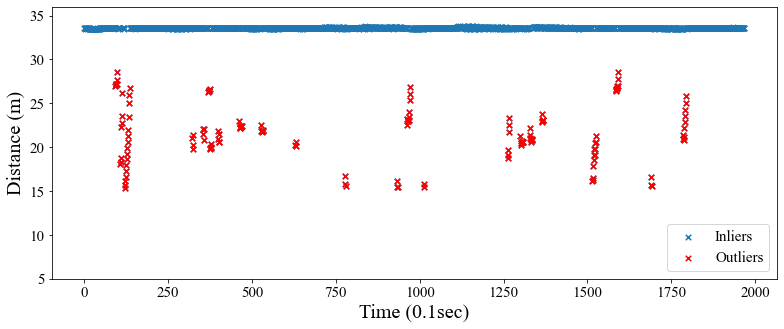

In [33]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Inliers")
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Outliers",c = 'r')
# plt.plot(np.arange(len(temp)),temp)
# plt.grid()
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(5,36)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture9.tif', dpi = 600)
plt.show()

In [22]:
thred_map = gen_bckmap(aggregated_map, d = 0.5, thred_s = 0.3, N = 20, delta_thred = 0.001, step = 0.1)

In [14]:
np.save(r'D:\Test\bck.npy',thred_map)

In [13]:
Td_map = aggregated_map[482]
Colored_map = Td_map < thred_map
# Colored_map[:,700:900] = 1
pcd = get_pcd_colored(Td_map,Colored_map)
draw(pcd,height=1000,width=1000)


WebVisualizer(window_uid='window_3')

In [ ]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.6]
plt.scatter(np.where(temp < 33.6)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.6,0,2000,color = 'g', label = "Identified Background Distance",)
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture13.tif', dpi = 600)
plt.show()

[33.608]
1429


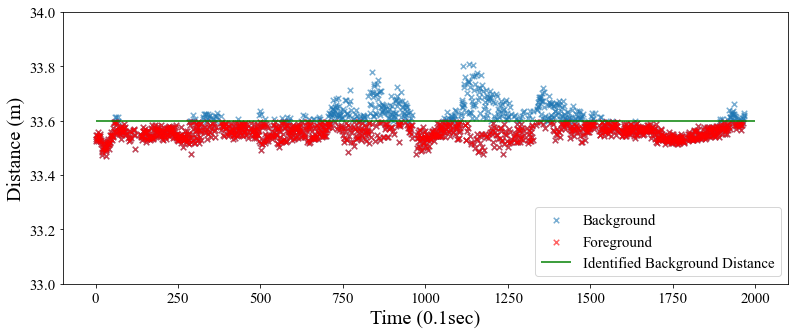

In [74]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.6]
plt.scatter(np.where(temp < 33.6)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.6,0,2000,color = 'g', label = "Identified Background Distance",)
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture13.tif', dpi = 600)
plt.show()

[33.608]
1429


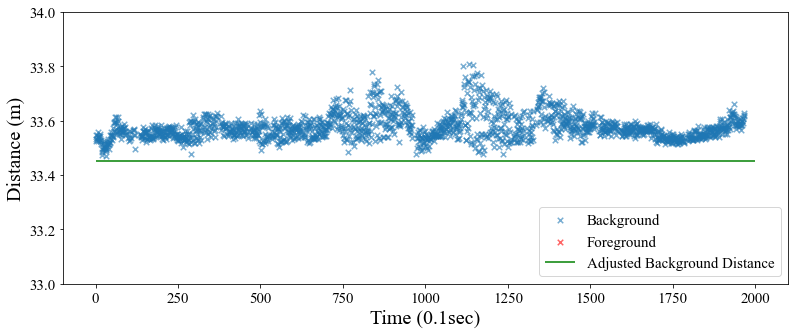

In [77]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.45,0,2000,color = 'g', label = "Adjusted Background Distance")
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture14.tif', dpi = 600)
plt.show()

[33.608]
1429


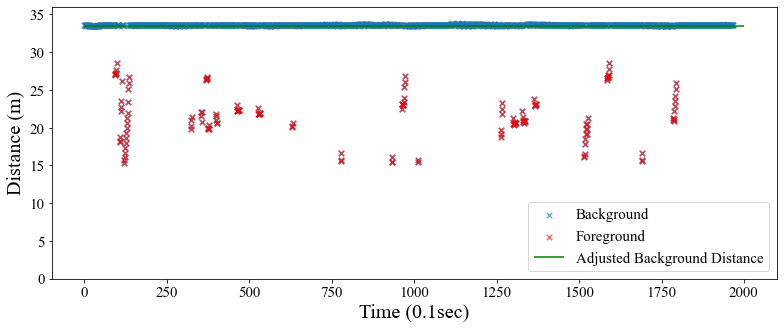

In [83]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.45,0,2000,color = 'g', label = "Adjusted Background Distance")
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(0,36)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture15.tif', dpi = 600)
plt.show()

[33.608]
1429


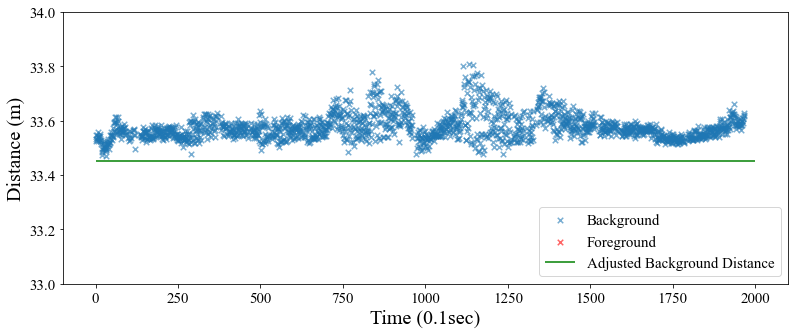

In [84]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.45,0,2000,color = 'g', label = "Adjusted Background Distance")
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture14.tif', dpi = 600)
plt.show()

In [8]:
db = Raster_DBSCAN(window_size=[5,19],eps = 1.5,min_samples= 14,Td_map_szie=thred_map.shape)

In [7]:
Td_map_0 = aggregated_map[1312]
Td_map_1 = aggregated_map[229]
Foreground_0 = (Td_map_0 < thred_map)&(Td_map_0 != 0)
Foreground_1 = (Td_map_1 < thred_map)&(Td_map_1 != 0)
Labeling_map_0 = db.fit_predict(Td_map= Td_map_0,Foreground_map=Foreground_1)
Labeling_map_1 = db.fit_predict(Td_map= Td_map_0,Foreground_map=Foreground_0)
unique_label_cur,unique_label_next = np.unique(Labeling_map_0)[1:],np.unique(Labeling_map_1)[1:]

In [23]:
Td_map = aggregated_map[228]
Foreground_map = (Td_map < thred_map)&(Td_map != 0)
Labeling_map = db.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)


In [41]:
pcd = get_pcd_colored(Td_map,Labeling_map)
draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_3')

In [9]:
pcd = get_pcd_colored_specified(Td_map,Labeling_map,[0,1])
draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_1')

In [10]:
rows_1,cols_1 = np.where(Labeling_map == 0)
rows_2,cols_2 = np.where(Labeling_map == 1)

In [11]:
cols_1

array([925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 936, 937, 938,
       939, 940, 941, 942, 943, 944, 945, 946, 947, 949, 951, 952, 954,
       955, 956, 959, 960, 961, 962, 963, 966, 967, 968, 969, 970, 972,
       973, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 986, 987,
       957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969,
       970, 971, 972, 973, 974, 975, 977], dtype=int64)

In [12]:
rows_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
cols_2

array([ 991,  993,  994,  995,  996,  997,  998, 1000, 1001, 1002, 1003,
       1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
       1015, 1016, 1017, 1018, 1019, 1020, 1021], dtype=int64)

In [14]:
rows_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
pd.DataFrame(Labeling_map).to_csv(r'D:/Test/LABEL.csv', index = False)

In [22]:
Sub_foremap,Sub_indmap,Sub_tdmap = db.Sub_foremap,db.Sub_indmap,db.Sub_tdmap

In [23]:
valid_windows = db.valid_windows

In [28]:
center_td_dist = Sub_tdmap[:,db.Height_fringe,db.Width_fringe].reshape(-1,1,1)

In [156]:
IoU_matrix = np.zeros((unique_label_cur.shape[0],unique_label_next.shape[0]))

In [157]:
for i,pair in enumerate(pairs_intersect):
    cur_label,next_label = pair[0],pair[1]
    Intersection_p = counts_intersect[i]
    A_p = counts_union[(pairs_union[:,0] == cur_label)]
    if A_p.size == 0:
        A_p = 0
    B_p = counts_union[(pairs_union[:,1] == next_label)]
    if B_p.size == 0:
        B_p = 0
    Union_p = Intersection_p + A_p + B_p
    IoU_matrix[unique_label_cur == cur_label,unique_label_next == next_label] = Intersection_p/Union_p

In [26]:
Td_map = aggregated_map[228]
Foreground_map = (Td_map < thred_map)&(Td_map != 0)
Labeling_map = db.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)


In [44]:
coords = []
labels = []
for r in range(Labeling_map.shape[0]):
    for c in range(Labeling_map.shape[1]):
        coords.append([c,-r])
        labels.append(Labeling_map[r,c])

In [45]:
coords = np.array(coords)

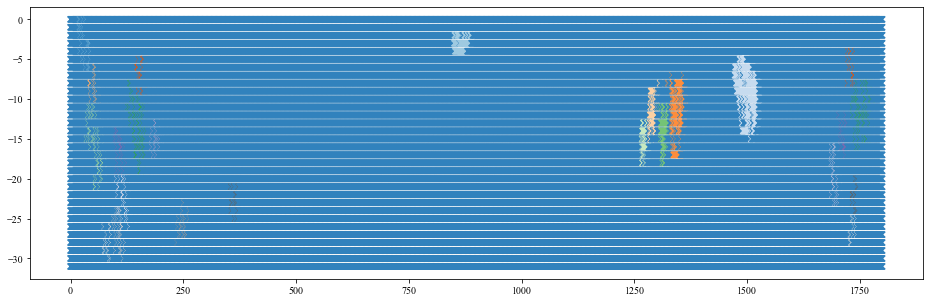

In [52]:
plt.figure(figsize=(16,5))
plt.scatter(coords[:,0],coords[:,1],c = labels,marker = 'x',cmap = 'tab20c')
plt.show()

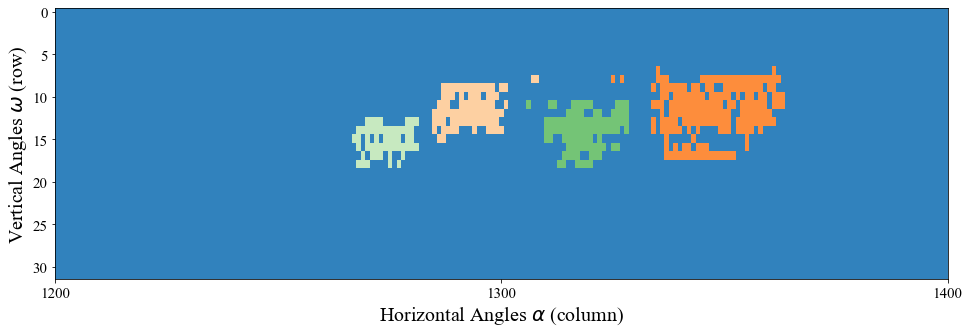

In [58]:
plt.figure(figsize=(16,5))
plt.imshow(Labeling_map, aspect='auto',cmap = 'tab20c')
plt.xlabel(r'Horizontal Angles $\mathit{\alpha}$ (column)',fontsize = 20)
plt.ylabel(r'Vertical Angles $\mathit{\omega} $ (row)',fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(0,1900,100),fontsize = 15)
plt.xlim(1200,1400)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture21.tif',dpi = 600)
plt.show()

In [59]:
Td_map = aggregated_map[229]
Foreground_map = (Td_map < thred_map)&(Td_map != 0)
Labeling_map = db.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)


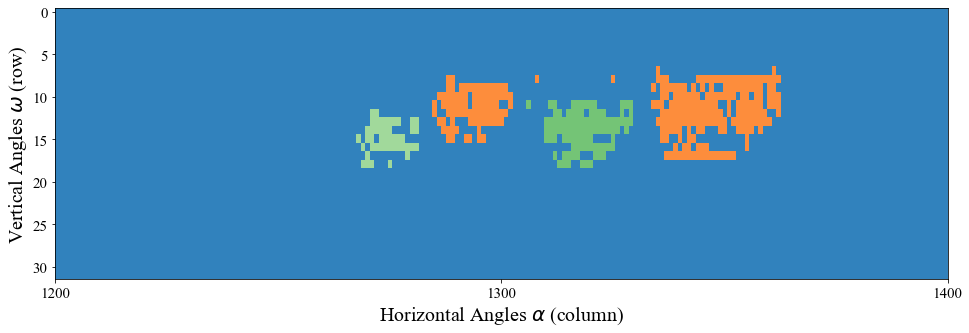

In [60]:
plt.figure(figsize=(16,5))
plt.imshow(Labeling_map, aspect='auto',cmap = 'tab20c')
plt.xlabel(r'Horizontal Angles $\mathit{\alpha}$ (column)',fontsize = 20)
plt.ylabel(r'Vertical Angles $\mathit{\omega} $ (row)',fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(0,1900,100),fontsize = 15)
plt.xlim(1200,1400)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture22.tif',dpi = 600)
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.imshow(aggregated_map[235], aspect='auto',cmap = 'binary')
plt.xlabel(r'Horizontal Angles $\mathit{\alpha}$ (column)',fontsize = 20)
plt.ylabel(r'Vertical Angles $\mathit{\omega} $ (row)',fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(0,1900,100),fontsize = 15)

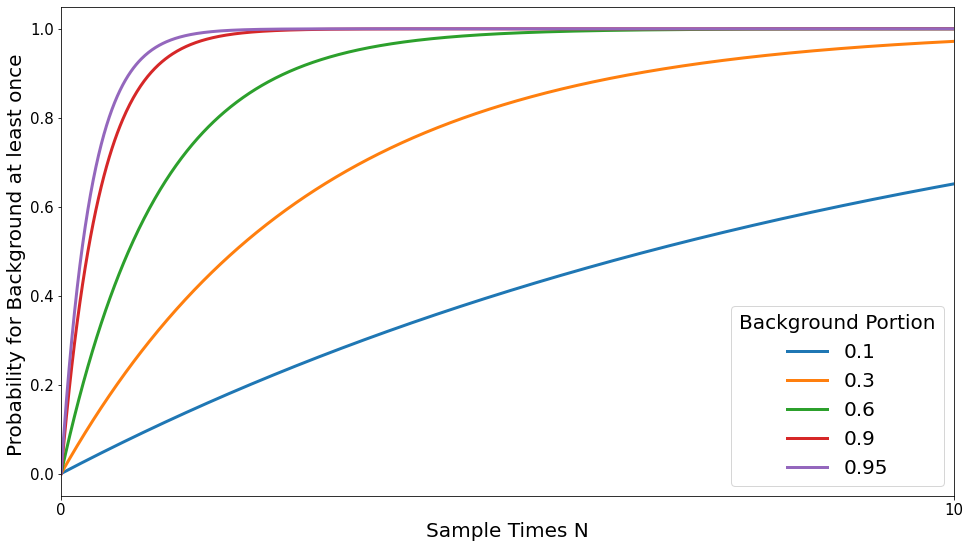

In [97]:
plt.figure(figsize=(16,9))
p_bcks = [0.1,0.3,0.6,0.9,0.95]
N = np.arange(0,100,0.01)
for p_bck in p_bcks:
    p_p1 = 1 - (1- p_bck)**N
    plt.plot(p_p1,label = p_bck,linewidth = 3)
plt.legend(fontsize = 20, title="Background Portion",title_fontsize=20)
plt.xlabel('Sample Times N',fontsize = 20)
plt.ylabel('Probability for Background at least once ',fontsize = 20)
plt.xticks(np.arange(0,11000,1000),np.arange(0,110,10),fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(0,1000)
# plt.savefig()
plt.show()

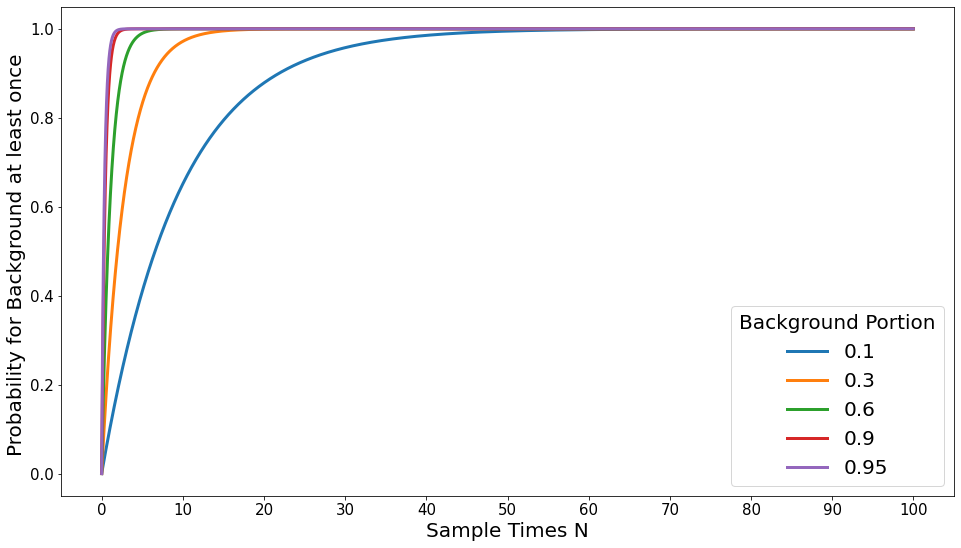

In [98]:
plt.figure(figsize=(16,9))
p_bcks = [0.1,0.3,0.6,0.9,0.95]
N = np.arange(0,100,0.01)
for p_bck in p_bcks:
    p_p1 = 1 - (1- p_bck)**N
    plt.plot(p_p1,label = p_bck,linewidth = 3)
plt.legend(fontsize = 20, title="Background Portion",title_fontsize=20)
plt.xlabel('Sample Times N',fontsize = 20)
plt.ylabel('Probability for Background at least once ',fontsize = 20)
plt.xticks(np.arange(0,11000,1000),np.arange(0,110,10),fontsize = 15)
plt.yticks(fontsize = 15)
# plt.xlim(0,1000)
plt.show()

In [119]:
p_bck = 0.5
N = np.arange(0,100,0.01)
p_p1 = 1 - (1- p_bck)**N


In [99]:
def get_gen(pcap_path,time,end_frame):
    lidar_reader = TDmapLoader(pcap_path)
    frame_gen = lidar_reader.frame_gen()
    aggregated_map = []
    sampled_ind = np.random.choice(np.arange(17000),size = 2000, replace = False)
    sampeled_num = 0
    for i in tqdm(range(end_frame)):
        Td_map = next(frame_gen)
        if i in sampled_ind:
            aggregated_map.append(Td_map)
            sampeled_num += 1
        if (sampeled_num == 2000) or (Td_map is None):
            break
    if len(aggregated_map) < 2000:
        for i in range(2000 - aggregated_map):
            aggregated_map.append(aggregated_maps[-1])
    return np.array(aggregated_map),time

In [100]:
bck_path = r'D:\LiDAR_Data\MidTown\Cheney'
output_path = r'D:\LiDAR_Data\MidTown\Cheney'
pcaps_list = os.listdir(bck_path)
pcaps_list = [p for p in pcaps_list if 'pcap' in p.split('.')]
times = [int(pcaps_list[i].split('.')[0].split('-')[-3]) for i in range(len(pcaps_list))]
aggregated_maps_multiple = []
time_ind = np.argsort(times)
results = Parallel(n_jobs=6)(delayed(get_gen)(os.path.join(bck_path,pcaps_list[i]),times[i],18000) for i in tqdm(range(len(pcaps_list))))


 29%|████████████████████████▏                                                          | 7/24 [07:30<20:26, 72.16s/it]

PicklingError: Could not pickle the task to send it to the workers.

In [60]:
aggregated_maps = []
times = []
for r,time in results:
    aggregated_maps.append(r)
    times.append(time)

In [61]:
aggregated_maps = np.array(aggregated_maps)
aggregated_maps = aggregated_maps[np.argsort(times)]

C:\Users\zhChe\AppData\Local\Temp/ipykernel_15600/1557525012.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  aggregated_maps = np.array(aggregated_maps)


In [67]:
laser_id = theta_raw[7] == theta
azimuth_channel = int(np.around((3300/100)/0.2)) + 30
temp = aggregated_maps
# thred = get_thred_modified(temp.flatten(),1,0.125,10,0.001,0.5)
# thred = threshold_map[laser_id,azimuth_channel]
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(aggregated_maps)),aggregated_maps[:,laser_id,azimuth_channel],s = 3)
plt.hlines(thred,0,len(aggregated_maps),color = 'r')
# plt.ylim(0,20)
plt.xticks(np.arange(0,24000,1000),np.arange(0,24,1),fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Laser Distance(m)',fontsize = 20)
plt.xlabel('Time(H)',fontsize = 20)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

<Figure size 720x360 with 0 Axes>

In [2]:
thred_map = np.load(r'D:\LiDAR_Data\MidTown\California\Calibration\bck_map.npy')

In [3]:
pcd = get_pcd_colored_dir(thred_map,np.full(thred_map.shape,True))

In [5]:
draw(pcd,height=1000,width=1000)

WebVisualizer(window_uid='window_1')

In [ ]:
def get_pcd_colored_dir(Td_map,Colored_map):

    Xs = []
    Ys = []
    Zs = []
    Labels = []
    for i in range(Td_map.shape[0]):
        longitudes = theta[i]*np.pi / 180
        latitudes = azimuths * np.pi / 180 
        hypotenuses = Td_map[i] * np.cos(longitudes)
        X = hypotenuses * np.sin(latitudes)
        Y = hypotenuses * np.cos(latitudes)
        Z = Td_map[i] * np.sin(longitudes)
        Valid_ind = (Td_map[i] != 0)
        Xs.append(X[Valid_ind])
        Ys.append(Y[Valid_ind])
        Zs.append(Z[Valid_ind])
        Labels.append(Colored_map[i][Valid_ind])

    Xs = np.concatenate(Xs)
    Ys = np.concatenate(Ys)
    Zs = np.concatenate(Zs)
    Labels = np.concatenate(Labels)
    XYZ = np.concatenate([Xs.reshape(-1,1),Ys.reshape(-1,1),Zs.reshape(-1,1)],axis = 1)
    Colors = np.full((len(Labels),3),np.array([[153,153,153]])/256)
    unique_label = np.unique(Labels)
    for l in unique_label[1:]:
        Colors[Labels == l] = color_map[l%len(color_map)]

    pcd = op3.geometry.PointCloud()
    pcd.points = op3.utility.Vector3dVector(XYZ)
    pcd.colors = op3.utility.Vector3dVector(Colors)
    
    return pcd     